# Laboratorio 3
## Data Science
Javier Ovalle 22103, 
José Ángel Morales 22689, 
Ricardo Morales 22289


In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import kagglehub

# Download latest version
#path = kagglehub.dataset_download("agungpambudi/mnist-multiple-dataset-comprehensive-analysis")

print("Path to dataset files:", path)

c:\Users\Javier Chiquin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 874M/874M [04:19<00:00, 3.53MB/s] 


Extracting files...
Path to dataset files: C:\Users\Javier Chiquin\.cache\kagglehub\datasets\agungpambudi\mnist-multiple-dataset-comprehensive-analysis\versions\3


In [4]:
#import opendatasets as od # no para python 3.13
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops

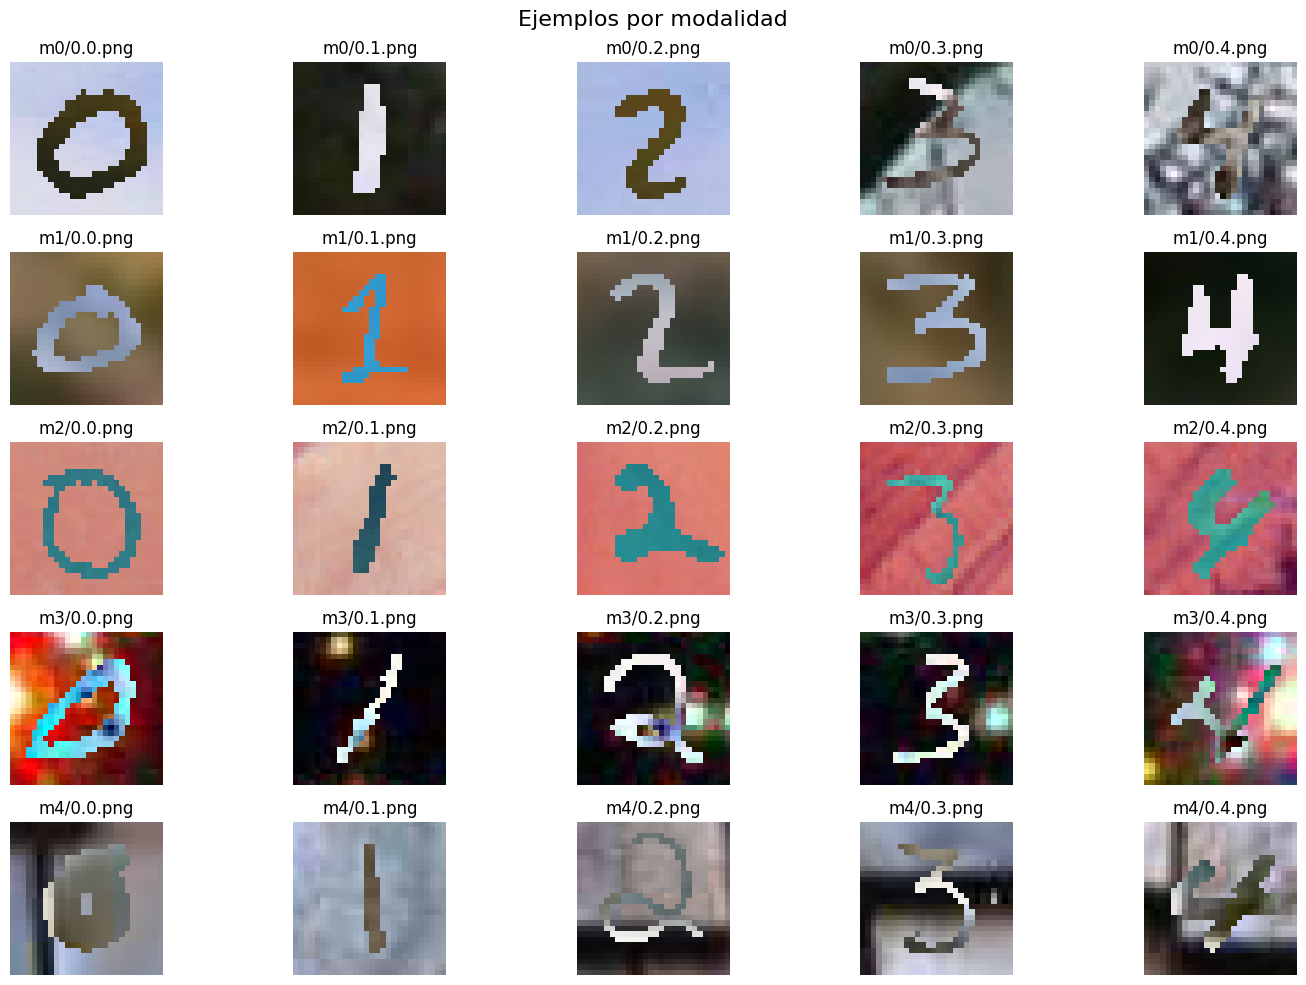

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Ruta base a las carpetas de modalidades
base_path = "C:\\Users\\Javier Chiquin\\.cache\\kagglehub\\datasets\\agungpambudi\\mnist-multiple-dataset-comprehensive-analysis\\versions\\3\\PolyMNIST\\MMNIST\\train"

# Mostrar 5 ejemplos de cada modalidad
modalidades = ['m0', 'm1', 'm2', 'm3', 'm4']
fig, axs = plt.subplots(len(modalidades), 5, figsize=(15, 10))

for i, mod in enumerate(modalidades):
    folder_path = os.path.join(base_path, mod)
    images = sorted(os.listdir(folder_path))[:5]  # Primeras 5 imágenes

    for j, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        image = Image.open(img_path)
        axs[i, j].imshow(image)
        axs[i, j].axis('off')
        axs[i, j].set_title(f"{mod}/{img_name}")

plt.suptitle("Ejemplos por modalidad", fontsize=16)
plt.tight_layout()
plt.show()


### Análisis Exploratorio

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

base_dir = "C:\\Users\\Javier Chiquin\\.cache\\kagglehub\\datasets\\agungpambudi\\mnist-multiple-dataset-comprehensive-analysis\\versions\\3\\PolyMNIST\\MMNIST\\train"
modalidades = ['m0', 'm1', 'm2', 'm3', 'm4']

for mod in modalidades:
    mod_path = os.path.join(base_dir, mod)
    images = os.listdir(mod_path)
    print(f"Modalidad {mod}: {len(images)} imágenes")
    
    # Mostrar resolución de la primera imagen
    img = Image.open(os.path.join(mod_path, images[0]))
    print(f"  Tamaño de imagen: {img.size}")


Modalidad m0: 60000 imágenes
  Tamaño de imagen: (28, 28)
Modalidad m1: 60000 imágenes
  Tamaño de imagen: (28, 28)
Modalidad m2: 60000 imágenes
  Tamaño de imagen: (28, 28)
Modalidad m3: 60000 imágenes
  Tamaño de imagen: (28, 28)
Modalidad m4: 60000 imágenes
  Tamaño de imagen: (28, 28)


In [19]:
#pip install torchvision

### División entre entrenamiento y prueba

In [21]:
import os
import glob
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms

# Dataset personalizado que navega por m0 a m4 y extrae labels desde el nombre
class PolyMNISTDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        
        for i in range(5):  # m0 a m4
            folder = os.path.join(root_dir, f'm{i}')
            images = glob.glob(os.path.join(folder, '*.png'))
            print(f"[INFO] Encontradas {len(images)} imágenes en {folder}")
            self.image_paths.extend(images)
            for path in images:
                filename = os.path.basename(path)
                label = int(float(filename.split('.')[0]))  # ej: 6.2.png → 6
                self.labels.append(label)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('L')  # Escala de grises
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Ruta absoluta corregida
base_dir = "C:\\Users\\Javier Chiquin\\.cache\\kagglehub\\datasets\\agungpambudi\\mnist-multiple-dataset-comprehensive-analysis\\versions\\3\\PolyMNIST\\MMNIST\\train"

# Transformaciones para normalizar imágenes
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Crear dataset personalizado
dataset = PolyMNISTDataset(root_dir=base_dir, transform=transform)

# División 80% entrenamiento, 20% prueba
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

print(f"Total de imágenes: {len(dataset)}")
print(f"Entrenamiento: {len(train_dataset)}")
print(f"Prueba: {len(test_dataset)}")


[INFO] Encontradas 60000 imágenes en C:\Users\Javier Chiquin\.cache\kagglehub\datasets\agungpambudi\mnist-multiple-dataset-comprehensive-analysis\versions\3\PolyMNIST\MMNIST\train\m0
[INFO] Encontradas 60000 imágenes en C:\Users\Javier Chiquin\.cache\kagglehub\datasets\agungpambudi\mnist-multiple-dataset-comprehensive-analysis\versions\3\PolyMNIST\MMNIST\train\m1
[INFO] Encontradas 60000 imágenes en C:\Users\Javier Chiquin\.cache\kagglehub\datasets\agungpambudi\mnist-multiple-dataset-comprehensive-analysis\versions\3\PolyMNIST\MMNIST\train\m2
[INFO] Encontradas 60000 imágenes en C:\Users\Javier Chiquin\.cache\kagglehub\datasets\agungpambudi\mnist-multiple-dataset-comprehensive-analysis\versions\3\PolyMNIST\MMNIST\train\m3
[INFO] Encontradas 60000 imágenes en C:\Users\Javier Chiquin\.cache\kagglehub\datasets\agungpambudi\mnist-multiple-dataset-comprehensive-analysis\versions\3\PolyMNIST\MMNIST\train\m4
Total de imágenes: 300000
Entrenamiento: 240000
Prueba: 60000


### Transformaciones a imágenes

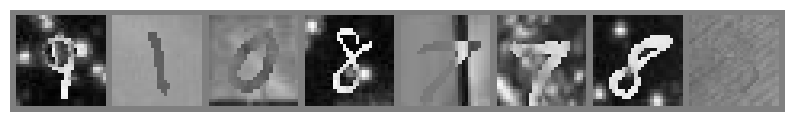

Etiquetas: 3267 3785 138 1460 5211 4225 785 5428


In [22]:
import matplotlib.pyplot as plt
import torchvision

# Función auxiliar para mostrar batch de imágenes
def imshow(img):
    img = img / 2 + 0.5     # desnormaliza
    npimg = img.numpy()
    plt.figure(figsize=(10,4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

# Obtener un batch del DataLoader de entrenamiento
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Mostrar las primeras 8 imágenes
imshow(torchvision.utils.make_grid(images[:8], nrow=8))
print('Etiquetas:', ' '.join('%d' % labels[j].item() for j in range(8)))


### Modelos de CNN

In [23]:
import torch.nn as nn
import torch.nn.functional as F

# Definimos una CNN sencilla
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Primer bloque convolucional
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # input: 1x28x28 → output: 32x28x28
        self.pool = nn.MaxPool2d(2, 2)  # output: 32x14x14

        # Segundo bloque convolucional
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # output: 64x14x14 → pooling → 64x7x7

        # Capa completamente conectada
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 clases

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = x.view(-1, 64 * 7 * 7)  # Aplanamos para FC
        x = F.relu(self.fc1(x))     # Capa oculta
        x = self.fc2(x)             # Capa de salida
        return x

# Inicializar modelo y mover a GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_cnn = SimpleCNN().to(device)

# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.001)

print(model_cnn)


SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### Modelo Red Neuronal Simple

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# --- Código del Lab3.ipynb (aquí irían tus importaciones y otras celdas) ---
# ... (tu código para cargar datos, transformaciones, etc.) ...
# Asumiendo que las imágenes se aplanarán a un vector de 28x28 = 784 píxeles.
# Si tus imágenes tienen un tamaño diferente, ajusta el valor '784'.

# 1. Definir la clase para la Red Neuronal Simple
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Definimos las capas completamente conectadas
        # Capa de entrada (784 píxeles) -> Capa oculta (128 neuronas)
        self.fc1 = nn.Linear(28 * 28, 128)
        # Capa oculta (128 neuronas) -> Capa de salida (10 clases)
        self.fc2 = nn.Linear(128, 10)  # 10 clases (m0 a m4 + posibles otras)

    def forward(self, x):
        # Aplanamos la imagen de 28x28 a un vector de 784
        x = x.view(-1, 28 * 28)
        # Aplicamos la primera capa lineal con función de activación ReLU
        x = F.relu(self.fc1(x))
        # Aplicamos la segunda capa lineal para la salida
        x = self.fc2(x)
        return x

# 2. Inicializar el modelo y mover a GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_nn = SimpleNN().to(device)

# 3. Definir función de pérdida y optimizador
# Usamos la misma función de pérdida y optimizador que en tu CNN
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_nn.parameters(), lr=0.001)

# 4. Imprimir la arquitectura del modelo
print(model_nn)

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
